In [2]:
import pandas as pd
from google.colab import drive

In [3]:
drive.mount("/F")

Mounted at /F


In [4]:
!ls '/F/My Drive/Maratona/Regressão Linear/'

 house_prices.csv		'Regressão Linear II.ipynb'
'Regressão Linear Casas.ipynb'	'Regressão Linear.ipynb'
'Regressão Linear III.ipynb'


In [5]:
base = pd.read_csv('/F/My Drive/Maratona/Regressão Linear/house_prices.csv')

In [6]:
base.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
base.count()

id               21613
date             21613
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64

In [8]:
base.shape

(21613, 21)

In [9]:
X = base.iloc[:, 5].values
X = X.reshape(-1,1)

In [10]:
X.shape

(21613, 1)

In [11]:
X

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]])

In [13]:
y = base.iloc[:, 2:3].values

In [14]:
y

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [15]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [16]:
X

array([[-0.97983502],
       [ 0.53363434],
       [-1.42625404],
       ...,
       [-1.15404732],
       [-0.52252773],
       [-1.15404732]])

In [17]:
y

array([[-0.86671733],
       [-0.00568792],
       [-0.98084935],
       ...,
       [-0.37586519],
       [-0.38158814],
       [-0.58588173]])

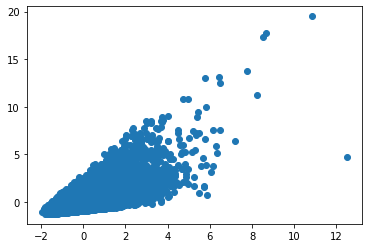

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X, y)

In [19]:
import numpy as np
np.random.seed(1)
np.random.rand(2)

array([0.417022  , 0.72032449])

In [20]:
import tensorflow as tf

y = b0 + b1*x

In [21]:
b0 = tf.Variable(0.41)
b1 = tf.Variable(0.72)

In [22]:
def linear_regression(x):
    return b0 + b1 * x

In [23]:
def error(y_pred, y_true):
    return tf.reduce_mean(tf.pow(y_pred - y_true, 2))

In [24]:
optimizer = tf.optimizers.SGD(learning_rate = 0.001)

In [25]:
batch_size = 32

In [26]:
for i in range(1000):
    indices = np.random.randint(len(X), size = batch_size)
    # Agrupa a computação dentro de um GradientTape
    with tf.GradientTape() as g:
        pred = linear_regression(X[indices])
        loss = error(pred, y[indices])

    # Computa os gradientes
    gradients = g.gradient(loss, [b1, b0])

    # Atualiza b1 e b0 seguindo os gradientes
    optimizer.apply_gradients(zip(gradients, [b1, b0]))

In [27]:
previsoes = b0 + b1 * X

In [28]:
previsoes = previsoes.numpy()

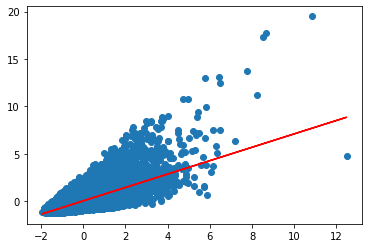

In [29]:
plt.plot(X, y, 'o')
plt.plot(X, previsoes, color = 'red')

In [30]:
y1 = scaler_y.inverse_transform(y)
previsoes1 = scaler_y.inverse_transform(previsoes)

In [31]:
y1

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [32]:
previsoes1

array([[307221.38],
       [699357.7 ],
       [191555.27],
       ...,
       [262083.39],
       [425708.6 ],
       [262083.39]], dtype=float32)

In [33]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y1, previsoes1)
mae

176858.2583073555